# STOCK MARKET PREDICTION(1st Feature)

## IMPORTING THE LIBRARIES
- **yfinance** for fetching stock data
- **numpy** for numerical operations
- **matplotlib.pyplot** for plotting
- **sklearn.preprocessing** for data preprocessing
- **sklearn.linear_model** and **sklearn.svm** for building the regression models.

In [11]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

## FETCHING THE STOCK PRICES

The historical stock data for Tesla (TSLA) from January 1, 2013, to January 1, 2023, is downloaded from Yahoo Finance using the `yf.download` function. The downloaded data is stored in the `data` variable.
e.

In [23]:
# Download historical stock data for Tesla (TSLA) from Yahoo Finance
ticker = "TSLA"
data = yf.download(ticker, start="2013-01-01", end="2023-01-01", progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000
...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


## EXTRACTING CLOSE PRICE FROM DATASET

The closing prices ('Close') from the downloaded data are extracted and reshaped into a 2D array with a single column using the `values.reshape(-1, 1)` method. This reshaping is done to prepare the data for normalization.


In [33]:
# Extract the 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

array([[  2.35733294],
       [  2.31800008],
       [  2.29333305],
       ...,
       [112.70999908],
       [121.81999969],
       [123.18000031]])

## NORMALIZE THE DATASET

The `MinMaxScaler` from `sklearn.preprocessing` is used to normalize the closing prices to the range [0, 1] using the `fit_transform` method.


In [37]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)
print(prices_scaled)

MinMaxScaler()
[[4.00545738e-04]
 [3.04088696e-04]
 [2.43597091e-04]
 ...
 [2.71021342e-01]
 [2.93362040e-01]
 [2.96697206e-01]]


## CREATING SEQUENCES FOR TRAINING

- A function `create_sequences` is defined to create input-output pairs for training the regression models.
- It takes the normalized prices data and a `sequence_length` parameter as input.
- Inside the function, a loop iterates through the data to create input sequences (`x`) and their corresponding output values (`y`) based on the `sequence_length`.
- The sequences are stored in separate lists `x` and `y`.
- The function returns the input sequences `x` and their corresponding output values `y` as NumPy arrays.


In [39]:
# Create sequences for training
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)

# Set sequence length and create sequences
sequence_length = 10
x, y = create_sequences(prices_scaled, sequence_length)

## TRAINING THE MODELS

Two regression models are trained:

### SUPPORT VECTOR MACHINE WITH RBF KERNEL
The SVM model (`svr_rbf`) is initialized with the following parameters:
- Kernel: RBF (Radial Basis Function)
- C: 100
- Gamma: 0.1
- Epsilon: 0.1

It is then trained on all the input sequences except the last 10 days using the `fit` method.

### LINEAR REGRESSION MODEL
The Linear Regression model (`linear_reg`) is initialized and trained in a similar manner.


In [7]:
# Train a Support Vector Machine (SVM) model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(x[:-10], y[:-10])  # Train on all data except the last 10 days

# Train a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(x[:-10], y[:-10])  # Train on all data except the last 10 days

LinearRegression()

## PREDICTING ON THE LAST 10 DAYS:

The last 10 days' input sequences (`x_pred`) are selected for prediction using both the SVM and Linear Regression models.

The `predict` method is used to obtain the predicted output values (`y_pred_svm` and `y_pred_linear`) from the SVM and Linear Regression models, respectively.


In [8]:
# Predict on the last 10 days using the trained models
x_pred = x[-10:]  # Use the last 10 days as input for prediction
y_pred_svm = svr_rbf.predict(x_pred)
y_pred_linear = linear_reg.predict(x_pred)

### INVERSE TRANFORMING RESULT:

After obtaining the predicted output values `y_pred_svm` and `y_pred_linear` from the SVM and Linear Regression models, respectively, the inverse transformation is applied to these predictions. This step is necessary because the models were trained on normalized data, and the predictions need to be transformed back to the original price scale for meaningful interpretation and comparison with the actual prices.

The `scaler.inverse_transform` method is used to perform this inverse transformation. This method reverses the scaling transformation applied to the data during normalization, effectively converting the scaled predictions back to their original scale.

The inverse transformation is applied as follows:

```python
# Inverse transform the scaled predictions to get the original scale
y_pred_svm_actual = scaler.inverse_transform(y_pred_svm.reshape(-1, 1))
y_pred_linear_actual = scaler.inverse_transform(y_pred_linear.reshape(-1, 1))


In [9]:
# Inverse transform to get back original prices for the last 10 days
y_test_actual = scaler.inverse_transform(y[-10:].reshape(-1, 1)).flatten()
y_pred_actual_svm = scaler.inverse_transform(y_pred_svm.reshape(-1, 1)).flatten()
y_pred_actual_linear = scaler.inverse_transform(y_pred_linear.reshape(-1, 1)).flatten()

### PLOTTING THE RESULTS

Finally, the actual prices for the last 10 days (`y_test_actual`) and the predicted prices from both models (`y_pred_actual_svm` and `y_pred_actual_linear`) are plotted against the dates using `matplotlib.pyplot`. The actual prices are plotted as black circles, the SVM predicted prices as a green line, and the Linear Regression predicted prices as a blue line. The plot is labeled and displayed using `plt.show()`.


Text(0, 0.5, 'Stock Price')

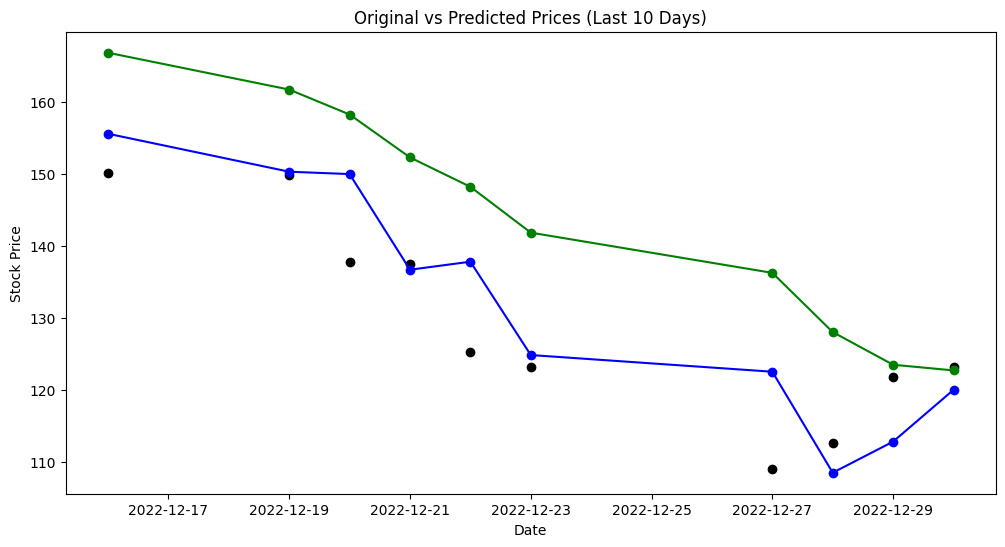

In [50]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(data.index[-10:], y_test_actual, label='Actual Prices', color='black', marker='o')
plt.plot(data.index[-10:], y_pred_actual_svm, label='SVM Predicted Prices', color='green', marker='o')
plt.plot(data.index[-10:], y_pred_actual_linear, label='Linear Regression Predicted Prices', color='blue', marker='o')
plt.title('Original vs Predicted Prices (Last 10 Days)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()